<h1>Netflix Data Analysis</h1>

### 1. Loading and Exploring datasets

In [1]:
#Importing the necessary modules for data analyis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
netflix = pd.read_csv("netflix_titles.csv") #Loading the csv file
netflix.head(5) #Checking the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#Checking the datatypes of the columns and non-null values count
netflix.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#Checking number of rows and columns in the dataset
netflix.shape

(8807, 12)

In [5]:
#Listing out all the movies in the dataset
netflix.loc[netflix['type'] == "Movie"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
#Listing out TV Shows in the dataset that were made in the US
#We can see that there are NaN values in the director column
#So next let's fix it
netflix.loc[(netflix['type'] == "TV Show") & (netflix['country'] == "United States")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
40,s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,"September 16, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,"September 15, 2021",1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za..."
82,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,"September 10, 2021",2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8710,s8711,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,"April 1, 2014",2012,TV-MA,8 Seasons,"TV Comedies, TV Dramas",A suburban mother starts selling marijuana to ...
8726,s8727,TV Show,When Calls the Heart,NaN,"Erin Krakow, Daniel Lissing, Lori Loughlin, Ma...",United States,"December 29, 2018",2017,TV-PG,5 Seasons,TV Dramas,"Leaving behind her upper-crust city roots, a w..."
8747,s8748,TV Show,Winsanity,NaN,Donald Faison,United States,"December 15, 2018",2016,TV-G,1 Season,Reality TV,Actor Donald Faison hosts this game show in wh...
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...


### 2. Data Cleaning

In [7]:
# Checking for duplicate data
netflix.duplicated().sum()

0

In [8]:
#Checking the missing/NULL values
netflix.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#Filling the missing values in the director, cast and country column with "Unknown"
netflix.fillna({"director": "Unknown"},inplace = True) 
netflix.fillna({"cast": "Unknown"},inplace = True)
netflix.fillna({"country": "Unknown"},inplace = True)
netflix.fillna({"rating": "Unknown"},inplace = True)
netflix.fillna({"duration": "Unknown"},inplace = True)

In [10]:
#Changing the datatype of the date_added
#Then, filling the missing values with last known value around them
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors = 'coerce')
netflix['date_added'] = netflix['date_added'].ffill()

In [11]:
#Checking the missing values left now
netflix.isnull().sum() 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
#Changing the column name to genre from listed_as
netflix = netflix.rename(columns={"listed_in": "genre"})

Currently the genre column has many different values separated using commas. So, Splitting the different genres into different rows


In [13]:
# Make sure 'genre' column is string
netflix['genre'] = netflix['genre'].astype(str)

#Split by comma, strip spaces, and "explode" into multiple rows
netflix['genre'] = netflix['genre'].str.split(',')
netflix = netflix.explode('genre')

# Remove extra spaces
netflix['genre'] = netflix['genre'].str.strip()

### 3. Visualization of Data

a. Popularity of each genre based on the amount of Series/TV shows made



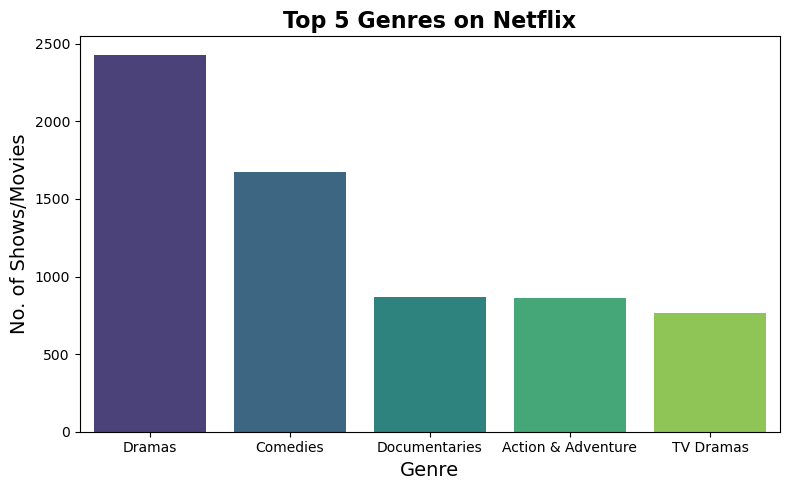

In [43]:
#Counting the occurance of a each genre in the dataset
count = netflix['genre'].value_counts().reset_index()

#In the dataset there are movies with tags International Movies/TV Shows, as they aren't a genre we have to drop them to find out the most popular genres
remove = ["International"]
check = '|'.join(remove)
filtered = count[~count['genre'].str.contains(check, case = False, na = False)]

#Taking the top 5 occuring genres for visualization
top5 = filtered.head(5)

#Plotting a bar graph to visualize the data
plt.figure(figsize = (8,5))
sns.barplot(x = 'genre', y = 'count', hue = 'genre', data = top5, palette = "viridis")

#Labeling the graph
plt.title("Top 5 Genres on Netflix", fontsize = 16, fontweight = "bold")
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("No. of Shows/Movies", fontsize = 14)

#Visualizing the data in a graph
plt.tight_layout() #To auto-adjust the spacing of the text to prevent cutoff
plt.show()

From the above bar graph, we can observe that the most popular genre by a big margin in Netflix are Dramas. Comedies are in second while other genres like Documentaries, Action & Adventure and TV Dramas are closely competing for the 3rd spot.

b. Original Release Years of Netflix Titles

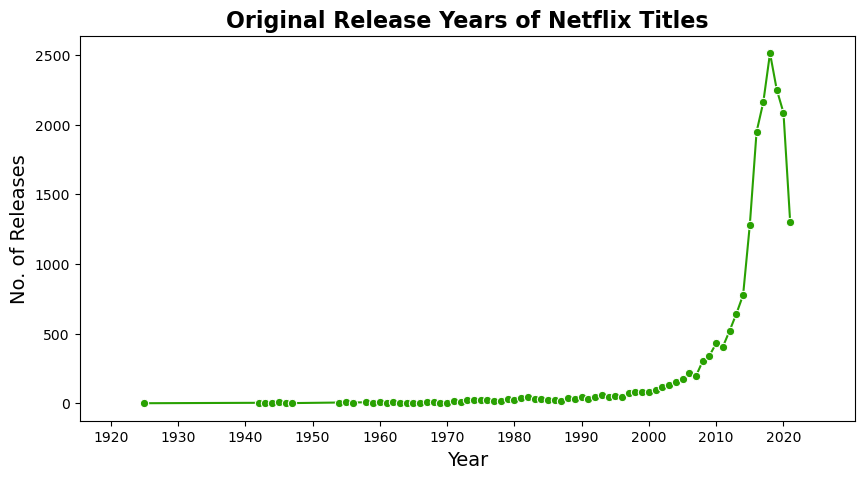

In [103]:
#Counting the occurances of the same year in the dataset
count = netflix['release_year'].value_counts().reset_index()

#Plotting the graph to visualize the data
plt.figure(figsize = (10,5))
graph = sns.lineplot(x = 'release_year', y = 'count', color = "#29a102",data = count, marker = "o")

#Setting the ranges of the x axis to 1920 to 2020
xrange = np.arange(1920,2025,10)

#Labeling the graph
plt.title("Original Release Years of Netflix Titles", fontsize = 16, fontweight = 'bold')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("No. of Releases", fontsize = 14)
plt.xticks(xrange)
plt.margins(x = 0.1)

#Visualizing the graph
plt.show()

We can clearly see the influx of movies and tv series that were released in the 2010s to 2020s. Netflix opts to go for more of the newer releases and but is also pretty consistent with the uploads of older classics to their platform, although not to the amount of their newer shows and movies.

Note: The dataset provies the original release year of each title, not the year it was added to Netflix. Therefore, the visualization reflects the historical production trends rather than Netflix's upload times.